In [1]:
%matplotlib inline

from IPython.display import clear_output
import torch
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from dataset import *
from tqdm import tqdm
from dataset import *
from CDP_test_real_noisy import test

cuda


# MNIST

Here we demonstrate the case for MNIST dataset

In [2]:
x_train, x_test = load_MNIST(32)
n_test  = 1000
n_batch = 32
n_steps=50
n_masks = 4
alpha = 4/n_masks
dataset = 'mnist'
mask_path_learned = f'./masks/{dataset}_learned_{n_masks}.npy'
u = np.load(mask_path_learned)
noise_type='Poisson'
noise_snr_list=[20,25,30,35,40]

Loaded MNIST dataset: x_train(50000, 32, 32), x_valid(10000, 32, 32)


In [3]:
mean_psnr_noise=[]
std_psnr_noise=[]
for noise_snr in noise_snr_list:
    x_test_rec,mse_list,psnr_list=test(u,alpha,x_test,n_test,n_batch,n_steps,noise_type='Poisson', noise_snr=noise_snr,plot_loss=False)
    mean_of_psnr = np.mean(psnr_list) 
    std_of_psnr=np.std(psnr_list)
    
    mean_psnr_noise.append(mean_of_psnr)
    std_psnr_noise.append(0.25*std_of_psnr)

mean_psnr_noise = np.array(mean_psnr_noise)
std_psnr_noise = np.array(std_psnr_noise)

100%|██████████| 32/32 [00:02<00:00, 11.50it/s]


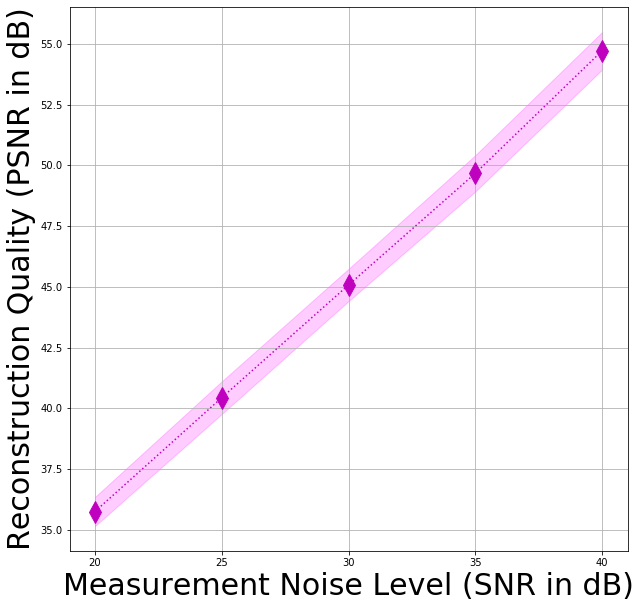

In [4]:
plt.figure(figsize=(10,10))
plt.plot(noise_snr_list,mean_psnr_noise,'md:', markersize=15)
plt.grid(True)
plt.xticks(noise_snr_list)
plt.fill_between(noise_snr_list,mean_psnr_noise-std_psnr_noise,mean_psnr_noise+std_psnr_noise,facecolor='magenta',color='magenta',alpha=0.2)
plt.xlabel('Measurement Noise Level (SNR in dB)',fontsize=30)
plt.ylabel('Reconstruction Quality (PSNR in dB)',fontsize=30)
plt.show()